# Left-Right symmetric model Lagrangian

In [660]:
from sympy import symbols, init_printing, Matrix, I, Add, eye, sqrt, conjugate, trace, factor, simplify
from sympy.physics import msigma 
init_printing()

## Scalars

### Triplets

In [661]:
deltaLp, deltaLpp = symbols(r'\delta_L^+, \delta_L^{++}')
deltaRp, deltaRpp = symbols(r'\delta_R^+, \delta_R^{++}')

#deltaLm, deltaLmm = symbols(r'\delta_L^-, \delta_L^{--}')
#deltaRm, deltaRmm = symbols(r'\delta_R^-, \delta_R^{--}')

deltaL0 = symbols(r'\delta_L^0')
deltaR0 = symbols(r'\delta_R^0') ####### debe de ser complejo por que tiene un vev complejo

In [662]:
sqrt2 = sqrt(2)
DeltaL = Matrix(
    [
        [deltaLp/sqrt2, deltaLpp],
        [deltaL0, -deltaLp/sqrt2]
    ]
)
DeltaR = Matrix(
    [
        [deltaRp/sqrt2, deltaRpp],
        [deltaR0, -deltaRp/sqrt2]
    ]
)

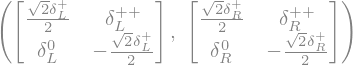

In [663]:
DeltaL, DeltaR

In [664]:
from sympy import sin, cos

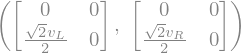

In [665]:
vL, vR, theta = symbols(r'v_L, v_R, \theta', positive=True)
vevL = {deltaL0:vL/sqrt2, deltaLp:0, deltaLpp:0}
vevR = {deltaR0:vR/sqrt2, deltaRp:0, deltaRpp:0}
DeltaL.subs(vevL), DeltaR.subs(vevR)

### Bidoublet

In [666]:
phi1p = symbols(r'\phi_1^+')
phi2p = symbols(r'\phi_2^+')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0')

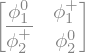

In [667]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [conjugate(phi2p), phi20]
    ]
)
Phi

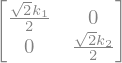

In [668]:
k1, k2 = symbols(r"k_1, k_2", positive=True)
vevPhi = {phi10:k1/sqrt2, phi20:k2/sqrt2, phi1p:0, phi2p:0}
Phi.subs(vevPhi)

## Scalar potential and Higgs mass spectrum

In [669]:
from sympy.physics.quantum import Dagger
from sympy import solve

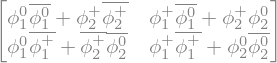

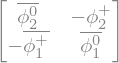

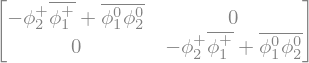

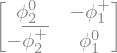

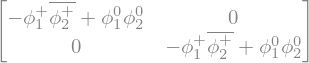

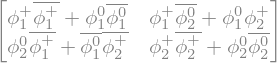

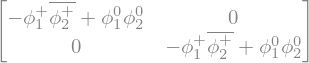

In [670]:
PhiDagger = Dagger(Phi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = (msigma(2)*conjugate(Phi)*msigma(2))
#Phitilde
display(Phitilde)
PhitildePhiDagger = Phitilde*PhiDagger
display(PhitildePhiDagger)
PhitildeDagger = Dagger(Phitilde)
#PhitildeDagger
display(PhitildeDagger)
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiPhitildeDagger)

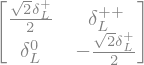

In [671]:
DeltaL

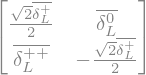

In [672]:
DeltaLDagger = Dagger(DeltaL)
DeltaLDagger

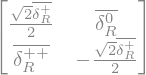

In [673]:
DeltaRDagger = Dagger(DeltaR)
DeltaRDagger

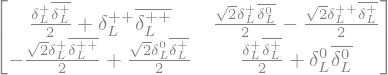

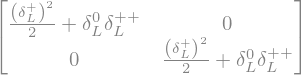

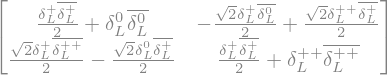

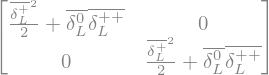

In [674]:
DeltaLDeltaLDagger = DeltaL*DeltaLDagger
display(DeltaLDeltaLDagger)
DeltaLDeltaL = DeltaL*DeltaL
display(DeltaLDeltaL)
DeltaLDaggerDeltaL = DeltaLDagger*DeltaL
display(DeltaLDaggerDeltaL)
DeltaLDaggerDeltaLDagger = DeltaLDagger*DeltaLDagger
display(DeltaLDaggerDeltaLDagger)

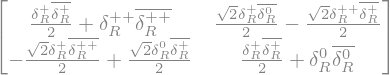

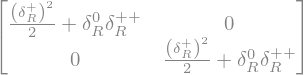

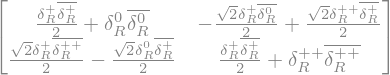

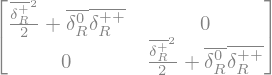

In [675]:
DeltaRDeltaRDagger = DeltaR*DeltaRDagger
display(DeltaRDeltaRDagger)
DeltaRDeltaR = DeltaR*DeltaR
display(DeltaRDeltaR)
DeltaRDaggerDeltaR = DeltaRDagger*DeltaR
display(DeltaRDaggerDeltaR)
DeltaRDaggerDeltaRDagger = DeltaRDagger*DeltaRDagger
display(DeltaRDaggerDeltaRDagger)

### Higgs potential

In [676]:
mu12, mu22, mu32 = symbols(r'\mu_1^2, \mu_2^2, \mu_3^2', real=True)
lamb1, lamb2, lamb3, lamb4 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4', real=True)
rho1, rho2, rho3, rho4 = symbols(r'\rho_1, \rho_2, \rho_3, \rho_4', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
beta1, beta2, beta3 = symbols(r'beta_1, beta_2, beta_3', real=True)

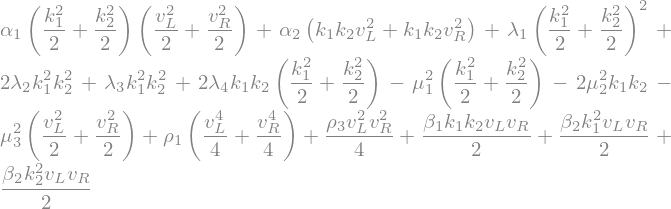

In [677]:
VLRPhi = (
    # Vphi
    -mu12*trace(PhiDaggerPhi)
    - mu22*(trace(Phitilde*PhiDagger) + trace(PhitildeDagger*Phi))
    #
    + lamb1*(trace(PhiPhiDagger))**2
    + lamb2*(trace(PhitildePhiDagger)**2 + trace(PhitildeDaggerPhi)**2)
    + lamb3*trace(PhitildePhiDagger)*trace(PhitildeDaggerPhi)
    + lamb4*trace(PhiDaggerPhi)*(trace(PhitildePhiDagger) + trace(PhitildeDaggerPhi))
    # Vtriplet
    -mu32*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + rho1*(trace(DeltaLDeltaLDagger)**2 + trace(DeltaRDeltaRDagger)**2)
    + rho2*(trace(DeltaLDeltaL)*trace(DeltaLDaggerDeltaLDagger) + trace(DeltaRDeltaR)*trace(DeltaRDaggerDeltaRDagger))
    + rho3*trace(DeltaLDeltaLDagger)*trace(DeltaRDeltaRDagger)
    + rho4*(trace(DeltaLDeltaL)*trace(DeltaRDaggerDeltaRDagger) + trace(DeltaLDaggerDeltaLDagger)*trace(DeltaRDeltaR))
    # Vdoubletriplet
    + alpha1*trace(PhiDaggerPhi)*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + alpha2*(
        trace(PhitildeDaggerPhi)*trace(DeltaRDeltaRDagger) + trace(PhitildePhiDagger)*trace(DeltaLDeltaLDagger) + 
        trace(PhitildePhiDagger)*trace(DeltaRDeltaRDagger) + trace(PhitildeDaggerPhi)*trace(DeltaLDeltaLDagger) # this term is different to Barenboim1996, because there is an error in the hermitian conjugate  the proportional terms to DeltaLDeltaLDagger
    )
    # + alpha3*(trace(PhiPhiDagger*DeltaLDeltaLDagger) + trace(PhiDaggerPhi*DeltaRDeltaRDagger))
    + beta1*(trace(Phi*DeltaR*PhiDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phi*DeltaRDagger))
    + beta2*(trace(Phitilde*DeltaR*PhiDagger*DeltaLDagger) + trace(PhitildeDagger*DeltaL*Phi*DeltaRDagger))
    # beta3 = beta2 in this case
    + beta2*(trace(Phi*DeltaR*PhitildeDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phitilde*DeltaRDagger))
)
VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

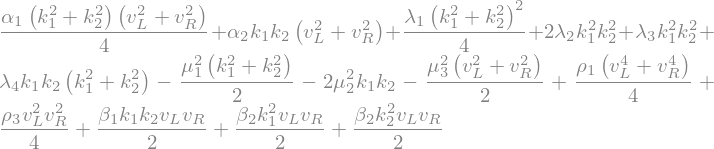

In [678]:
VLRPhi_vev = VLRPhi.subs(vevL).subs(vevR).subs(vevPhi).simplify()#.collect([mu12, mu22, mu32, lamb2, rho1, beta2], factor)#.subs(k1ri)
VLRPhi_vev

In [679]:
scalar_vevs = [k1, k2, vR, vL]
tadpoles_relations = {}
for vev in scalar_vevs:
    tadpoles_relations[vev] = VLRPhi_vev.diff(vev).expand().collect(
    [alpha1, alpha2, lamb1, lamb2, lamb3, lamb4, beta1, beta2], factor)

In [680]:
from sympy import Symbol

## Caso $k_2=k_1$

In [681]:
from sympy import trigsimp

In [682]:
tadpoles_relations_caso1 = {}
for vev in tadpoles_relations:
    tadpoles_relations_caso1[vev] = tadpoles_relations[vev]#.subs(k2, k1)

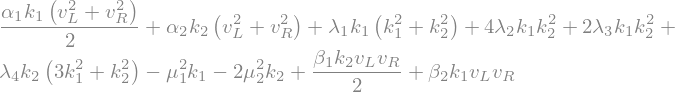

In [683]:
tadpole1_caso1 = tadpoles_relations_caso1[k1].trigsimp()
tadpole1_caso1

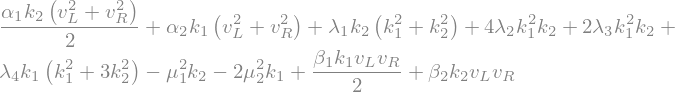

In [684]:
tadpole2_caso1 = tadpoles_relations_caso1[k2].trigsimp()
tadpole2_caso1

In [685]:
tadpole12_sol_caso1 = solve([tadpole1_caso1, tadpole2_caso1], [mu12, mu22], dict=True)[0]

In [686]:
for vev in tadpole12_sol_caso1:
    tadpole12_sol_caso1[vev] = tadpole12_sol_caso1[vev].collect([k1, alpha1, alpha2],  trigsimp)

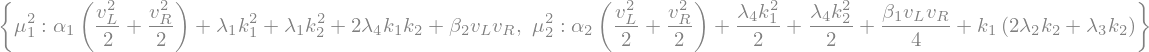

In [687]:
tadpole12_sol_caso1

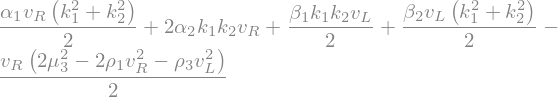

In [688]:
tadpole3_caso1 = tadpoles_relations_caso1[vR].trigsimp()
tadpole3_caso1

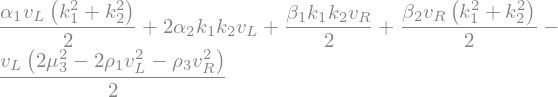

In [689]:
tadpole4_caso1 = tadpoles_relations_caso1[vL].trigsimp()
tadpole4_caso1

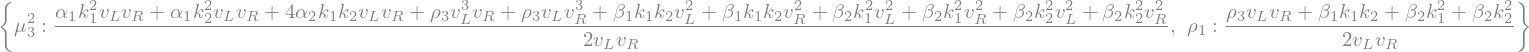

In [690]:
mu32_sol = solve([tadpole3_caso1, tadpole4_caso1], [mu32, rho1], dict=True)[0]
mu32_sol

## Mass matrices

Expand neutral fields in terms of real and imaginary parts
$$F = \frac{1}{\sqrt{2}}(F^r + i F^i)$$

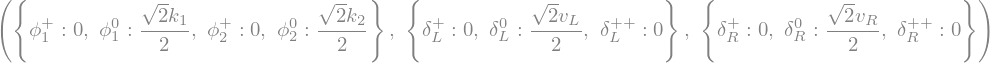

In [691]:
vevPhi, vevL, vevR

In [692]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
deltaR0r, deltaR0i = symbols(r'\delta_R^{0r}, \delta_R^{0i}', real=True)
deltaL0r, deltaL0i = symbols(r'\delta_L^{0r}, \delta_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (k1 + phi10r + I*phi10i)/sqrt2,
    phi20: (k2 + phi20r + I*phi20i)/sqrt2,
    deltaR0: (vR + deltaR0r + I*deltaR0i)/sqrt2,
    deltaL0: (vL + deltaL0r + I*deltaL0i)/sqrt2
}

In [693]:
VLRPhi_ri = VLRPhi.subs(complex_scalar_fields)

# Scalar ms

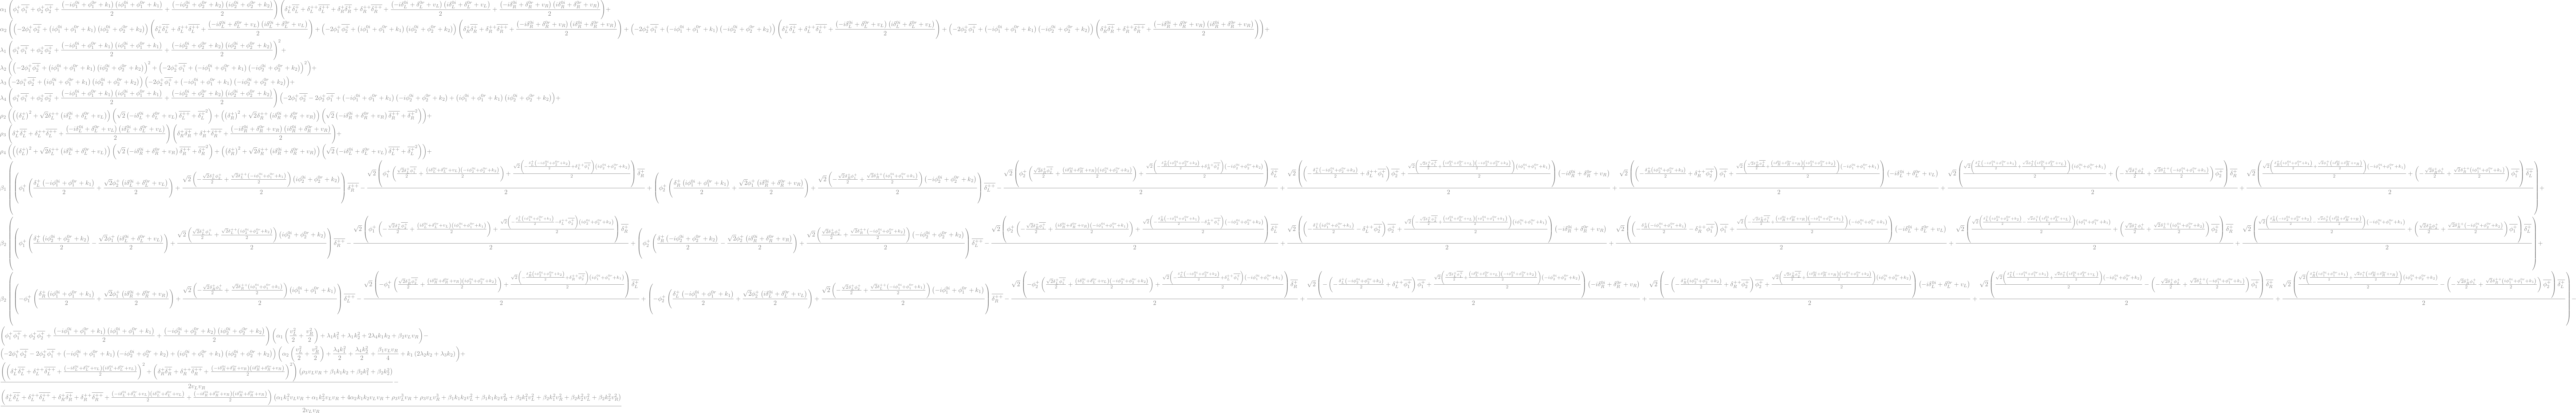

In [694]:
VLRPhi_ri_tadpole_caso1 = VLRPhi_ri.subs(tadpole12_sol_caso1).subs(mu32_sol)
VLRPhi_ri_tadpole_caso1

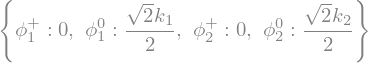

In [695]:
vevPhi

In [696]:
vevPhi[phi10r] = 0#vevPhi[phi10]
vevPhi[phi10i] = 0
vevPhi[phi20r] = 0#vevPhi[phi20]
vevPhi[phi20i] = 0

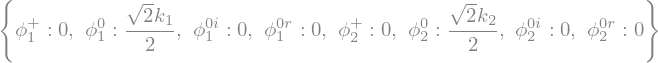

In [697]:
vevPhi

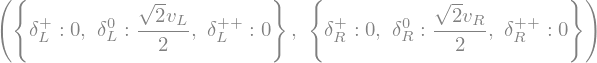

In [698]:
vevL,vevR

In [699]:
vevL[deltaL0r] = 0#vevL[deltaL0]
vevL[deltaL0i] = 0
vevR[deltaR0r] = 0#vevR[deltaR0]
vevR[deltaR0i] = 0

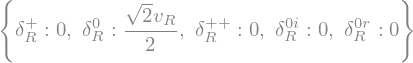

In [700]:
vevR

In [701]:
from sympy import derive_by_array

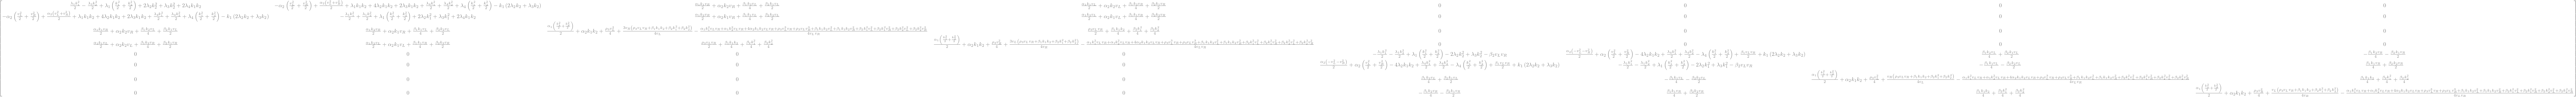

In [702]:
phir_fields = [phi10r, phi20r, deltaR0r, deltaL0r]
phii_fields = [phi10i, phi20i, deltaR0i, deltaL0i]
phiri_fields = phir_fields + phii_fields
MRI_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1, phiri_fields), phiri_fields)/2).subs(
    vevPhi
).subs(vevL).subs(vevR)#.subs(k2, k1)
MRI_square

In [703]:
MRI_square.rank()

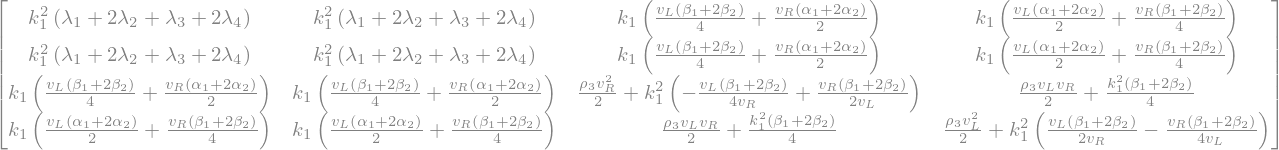

In [704]:
Mrr = MRI_square[0:4, 0:4].applyfunc(lambda x: x.expand().trigsimp().subs(k2, k1).collect([k1, vL, vR], lambda x:x.collect([vL, vR],factor)))
Mrr

In [705]:
Mrr.rank()

$$r = \frac{v_L}{v_R}$$

In [706]:
from sympy import Poly
def large_term_propto_(exp, vR):

    # Convert the expression to a polynomial and find the highest degree term
    poly = Poly(exp.replace(vR**-1,0), vR)
    highest_term = poly.LC() * vR**poly.degree()

    return highest_term


In [707]:
def large_term_propto_(exp, vR):

    # Convert the expression to a polynomial and find the highest degree term
    poly = Poly(exp.replace(vR**-1,0), vR)
    terms = poly.terms()  # Returns a list of (monomial, coefficient) pairs sorted by degree

    # Extract the most important and second most important terms
    if len(terms) >= 2:
        most_important_term = terms[0][1]*vR**terms[0][0][0]  # Highest degree term
        second_most_important_term = terms[1][1]*vR**terms[1][0][0]  # Second highest degree term
        result = most_important_term + second_most_important_term
    elif len(terms) == 1:
        result = terms[0][1] * vR**terms[0][0][0]  # Only one term exists
    else:
        result = 0  # No terms in the polynomial

    return result


In [708]:
r = symbols('r', positive=True)
r_change = {vL:r*vR}
def large_term_propto_(exp, vR):

    # Convert the expression to a polynomial and find the highest degree term
    term_approx = exp.subs(r_change).series(x=r, x0=0, n=2).removeO().subs(r, vL/vR)

    return term_approx

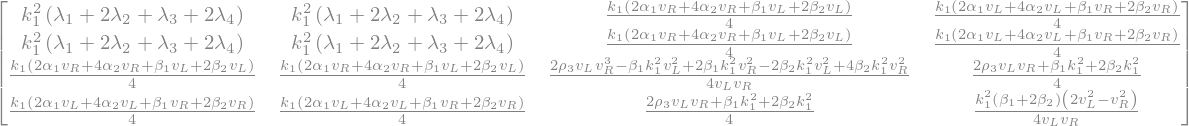

In [709]:
Mrr_vR = Mrr.tomatrix().applyfunc(lambda x: large_term_propto_(x, vR).factor())
Mrr_vR

In [710]:
Mrr_vR.rank()

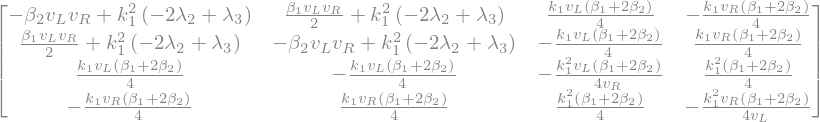

In [ ]:
Mii = MRI_square[4:8, 4:8].applyfunc(
    lambda x: x.expand().trigsimp().subs(k2, k1).collect([k1, vL, vR], lambda x:x.collect([vL, vR],factor))
)
Mii

In [712]:
Mii.rank()

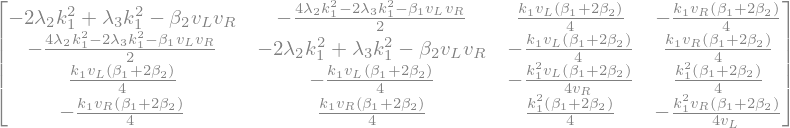

In [713]:
Mii_vR = Mii.tomatrix().applyfunc(lambda x: large_term_propto_(x, vR).factor())
Mii_vR

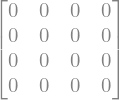

In [714]:
Mri = MRI_square[0:4, 4:8]
Mri

In [715]:
from sympy import Dummy

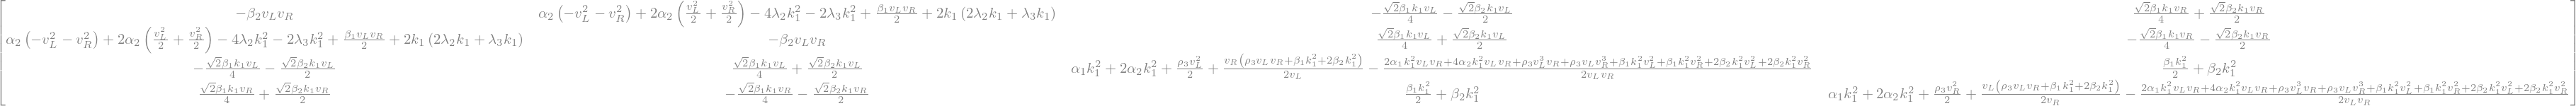

In [716]:
phip_fields = [phi1p, phi2p, deltaRp, deltaLp]

dummyconjugate1p = Dummy(r'\phi_1^{+,d}')
dummyconjugate2p = Dummy(r'\phi_2^{+,d}')
dummyconjugateRp = Dummy(r'\delta_R^{+,d}')
dummyconjugateLp = Dummy(r'\delta_L^{+,d}')

dummychangep = {
    conjugate(phi1p):dummyconjugate1p,
    conjugate(phi2p):dummyconjugate2p,
    conjugate(deltaRp):dummyconjugateRp,
    conjugate(deltaLp):dummyconjugateLp
}
phim_fields = [dummyconjugate1p, dummyconjugate2p, dummyconjugateRp, dummyconjugateLp] #list(dummychangep.values())
Mp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1.subs(dummychangep), phim_fields), phip_fields)).subs(
    {value:key for key, value in dummychangep.items()}
).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2, k1)
Mp_square

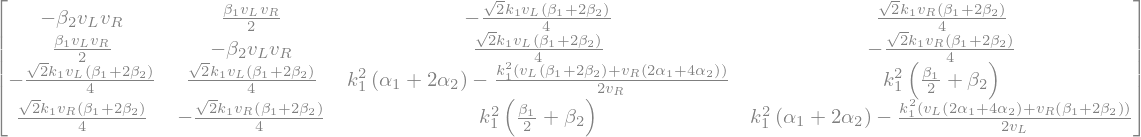

In [719]:
Mp_square.applyfunc(lambda x:x.collect(k1, lambda x:x.factor().collect([vL, vR])))

In [720]:
Mp_square.rank()

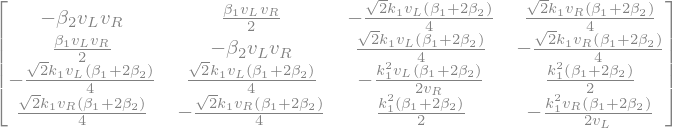

In [721]:
Mp_vR = Mp_square.tomatrix().applyfunc(lambda x: large_term_propto_(x, vR).factor())
Mp_vR

In [722]:
def build_mass_matrix(potential, fields1, fields2):
    """
    Build the mass matrix for a given potential and fields.
    """
    # Initialize the mass matrix
    Matrix_elements = derive_by_array(derive_by_array(potential, fields1), fields2)

    return Matrix_elements.tomatrix()

# Calculating the mass matrices of the scalars

The following two functions allows us calculate the mass matrices

In [723]:
def charpoly_coeffs_approximatevR(M, simplification= lambda x:x):
    """
    Approximate the coefficients of the characteristic polynomial of a matrix M
    keeping only the terms with large degree on vR
    """
    charpoly = M.charpoly()
    coeffs = charpoly.coeffs()
    for i in range(len(coeffs)):
        coeffs[i] = simplification(large_term_propto_(coeffs[i], vR))
    return coeffs

def construct_poly(coeffs_list, x):
    """
    Construct a polynomial from a list of coefficients
    """
    poly = 0
    power = len(coeffs_list)
    for i in range(power):
        poly += coeffs_list[i] * x**(power-1 - i)
    return poly

## Mass doubly charged scalars

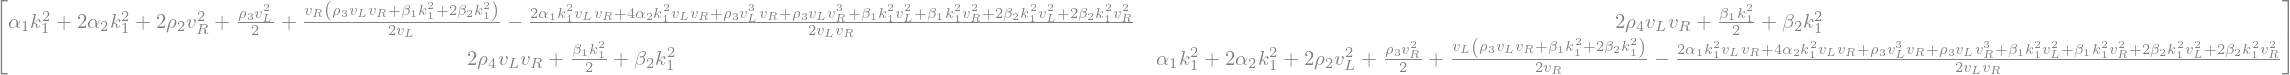

In [831]:
phipp_fields = [deltaRpp, deltaLpp]
dummyconjugateRpp = Dummy('deltaRpp')
dummyconjugateLpp = Dummy('deltaLpp')
dummychangepp = {
    conjugate(deltaRpp):dummyconjugateRpp,
    conjugate(deltaLpp):dummyconjugateLpp
}
phippc_fields = list(dummychangepp.values())#[deltaRmm, deltaLmm]
Mpp_square = (
    build_mass_matrix(VLRPhi_ri_tadpole_caso1.subs(dummychangepp), fields1=phippc_fields, fields2=phipp_fields)
).subs(
    vevPhi
).subs(vevPhi).subs(vevL).subs(vevR).subs(k2, k1)
Mpp_square

In [832]:
Mpp_square.rank()

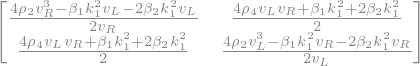

In [834]:
# Mpp_vR = Mpp_square.applyfunc(lambda x: large_term_propto_(x, vR).factor())
Mpp_vR = Mpp_square.applyfunc(factor)
Mpp_vR

In [894]:
Ppp, Dpp = Mpp_vR.diagonalize()

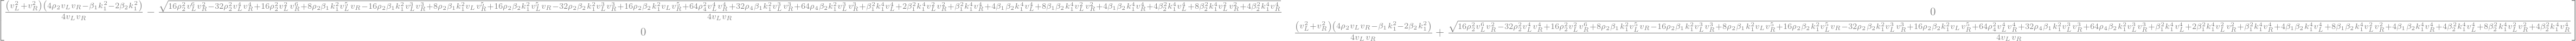

In [895]:
Dpp

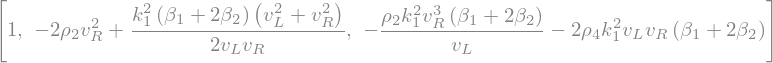

In [770]:
Mpp_charpoly_coeffs = charpoly_coeffs_approximatevR(Mpp_vR, lambda x:x.collect([rho2, k1, beta1, beta2], factor))
Mpp_charpoly_coeffs

In [771]:
x = symbols('x')

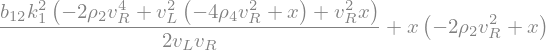

In [896]:
b12 = symbols('b_{12}', positive=True)
termpp = construct_poly(Mpp_charpoly_coeffs, x).subs(beta1 + 2*beta2, b12)
termpp = termpp.expand().collect([k1], lambda x:x.factor().collect([vL, vR], factor))
termpp

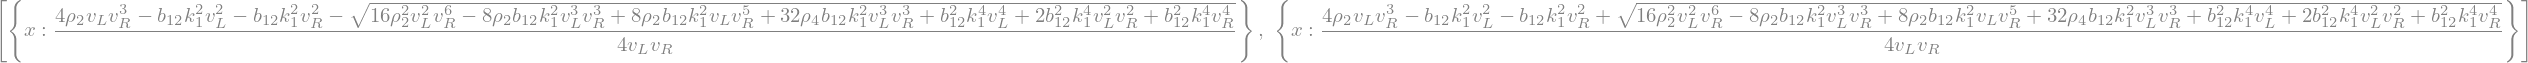

In [783]:
mpp_sol =  solve(termpp, x, dict=True)
mpp_sol

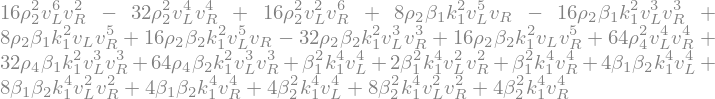

In [897]:
#terminsqrt = (mpp_sol[1][x] - mpp_sol[0][x]).simplify().args[3].args[0]
terminsqrt = (Dpp[0,0] - Dpp[1,1]).simplify().args[3].args[0]
terminsqrt

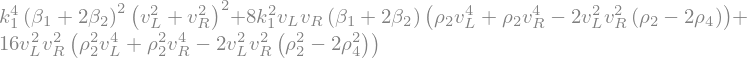

In [898]:
terminsqrt_approx = terminsqrt.collect([k1], lambda x:x.factor().collect([vL,vR], factor))
terminsqrt_approx

In [899]:
Dpp[0,0] = Dpp[0,0].subs(
        terminsqrt,
        terminsqrt_approx
    ).collect([-k1**2]).subs(beta1 + 2*beta2, b12)

Dpp[1,1] = Dpp[1,1].subs(
        terminsqrt,
        terminsqrt_approx
    ).collect([-k1**2]).subs(beta1 + 2*beta2, b12)

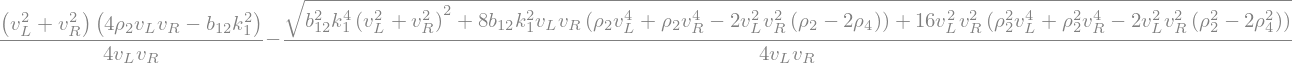

In [900]:
Dpp[0,0]

In [839]:
for i in [0,1]:
    mpp_sol[i][x] = mpp_sol[i][x].subs(
        terminsqrt,
        terminsqrt_approx
    ).collect([k1])

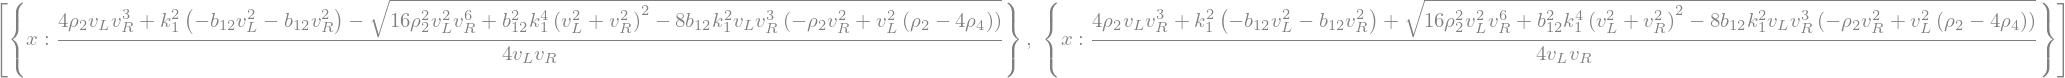

In [787]:
mpp_sol

In [841]:
mH1pp = symbols('m_{H_1^{++}}', positive=True)
mH2pp = symbols('m_{H_2^{++}}', positive=True)

In [842]:
from sympy import Eq

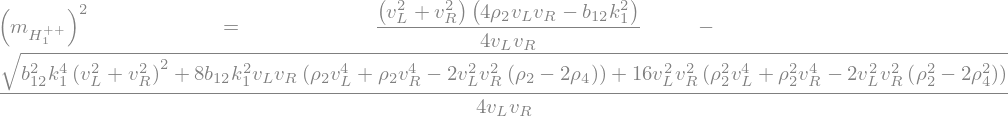

In [901]:
#eq1 = Eq(mH1pp**2, large_term_propto_(mpp_sol[0][x], vR))
#eq1 = Eq(mH1pp**2, large_term_propto_(Dpp[0,0], vR).factor())
eq1 = Eq(mH1pp**2, Dpp[0,0])
eq1

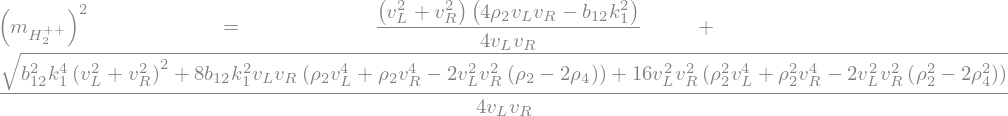

In [902]:
#eq2 = Eq(mH2pp**2, large_term_propto_(mpp_sol[1][x], vR))
#eq2 = Eq(mH2pp**2, large_term_propto_(Dpp[1,1], vR).factor())
eq2 = Eq(mH2pp**2, Dpp[1,1])
eq2

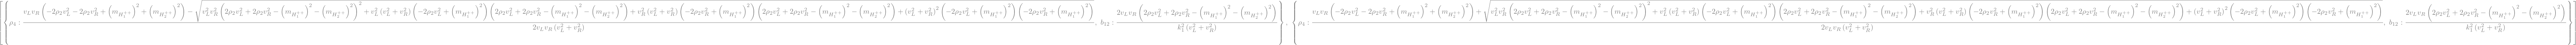

In [905]:
rho23_sol = solve([eq1, eq2], [rho4, b12], dict=True)#[0] # beta1*k1**2 + 2*beta2*k1**2
rho23_sol

## Mass singly charged scalars

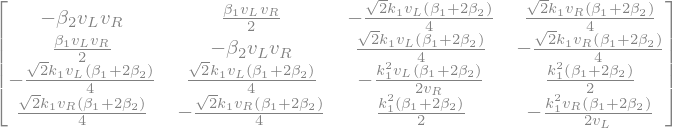

In [906]:
Mp_square.applyfunc(factor)

In [907]:
Mp_square.applyfunc(factor).rank()

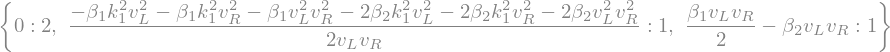

In [908]:
Mp_eigenvals_dict = Mp_square.applyfunc(factor).tomatrix().eigenvals()
Mp_eigenvals_dict

In [909]:
Pp, Dp = Mp_square.applyfunc(factor).tomatrix().diagonalize()

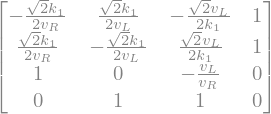

In [919]:
Pp

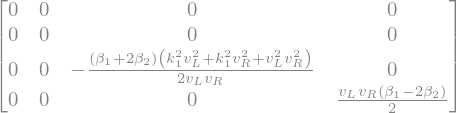

In [920]:
Dp = Dp.applyfunc(factor)
Dp

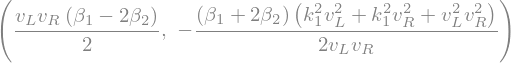

In [921]:
#mH1p_exp, mH2p_exp, mGp = list(Mp_eigenvals_dict.keys())
mH1p_exp, mH2p_exp = Dp[3,3], Dp[2,2]
mH1p_exp, mH2p_exp

In [922]:
mH1p, mH2p = symbols('m_{H_1^+}, m_{H_2^+}', positive=True)

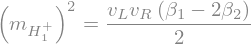

In [923]:
eq1p = Eq(mH1p**2, mH1p_exp.factor())
eq1p

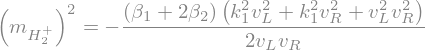

In [924]:
eq2p = Eq(mH2p**2, mH2p_exp.factor())
eq2p

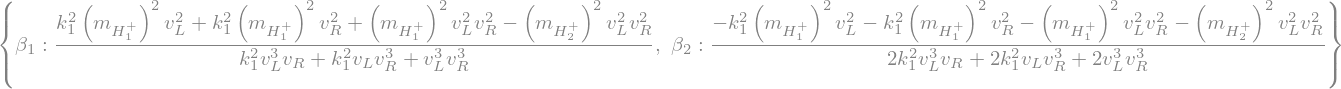

In [925]:
beta12_sol = solve([eq1p, eq2p], [beta1, beta2], dict=True)[0]
beta12_sol

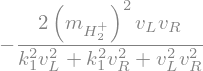

In [926]:
(beta1 + 2*beta2).subs(beta12_sol).simplify()

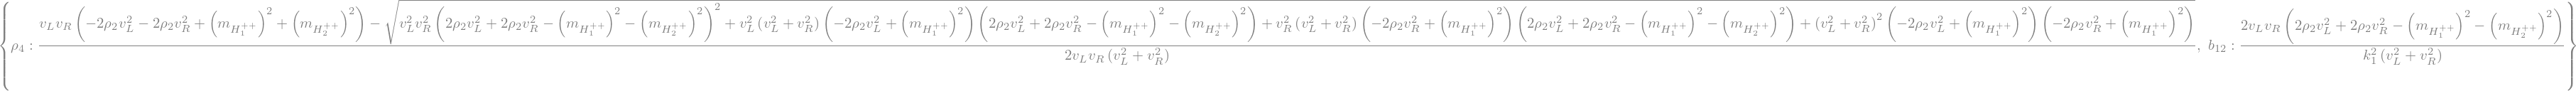

In [918]:
rho23_sol[0]

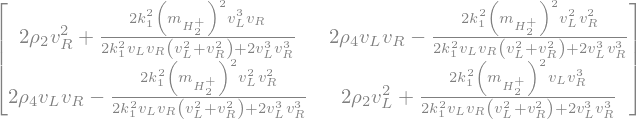

In [931]:
Mpp_vR2 = Mpp_vR.subs(beta12_sol).applyfunc(lambda x:x.expand().collect(k1, lambda x:x.collect([vL, vR], factor)))
Mpp_vR2

In [942]:
Ppp, Dpp = Mpp_vR2.diagonalize()

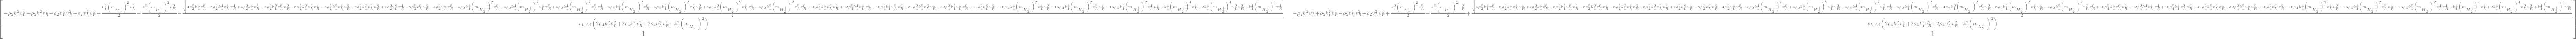

In [951]:
Ppp

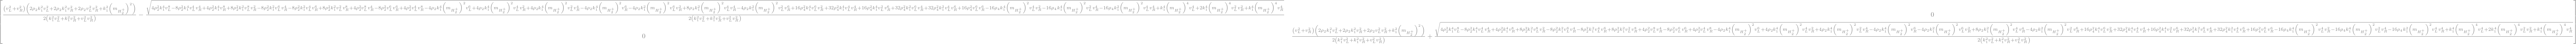

In [943]:
Dpp

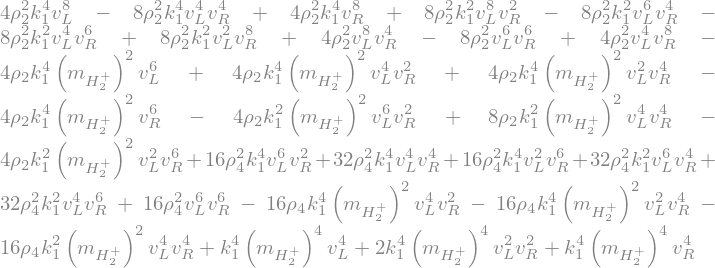

In [944]:
terminsqrt = (Dpp[0,0] - Dpp[1,1]).simplify().args[2].args[0]
terminsqrt

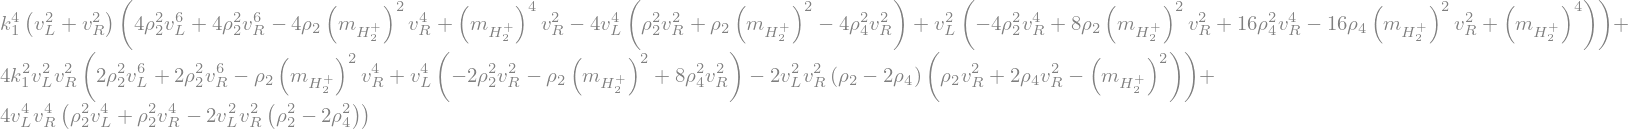

In [945]:

terminsqrt_approx = terminsqrt.collect([k1], lambda x:x.factor().collect([vL,vR], factor))
terminsqrt_approx

In [946]:
Dpp[0,0] = Dpp[0,0].subs(
        terminsqrt,
        terminsqrt_approx
    ).collect([k1**2]).subs(beta1 + 2*beta2, b12)

Dpp[1,1] = Dpp[1,1].subs(
        terminsqrt,
        terminsqrt_approx
    ).collect([k1**2]).subs(beta1 + 2*beta2, b12)

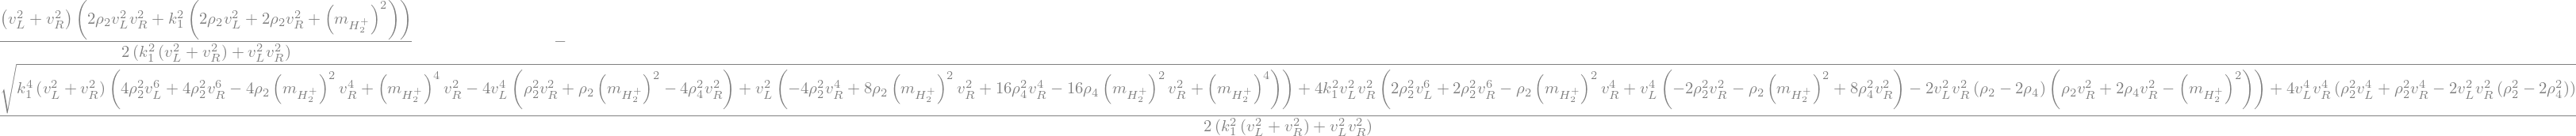

In [947]:
Dpp[0,0]

In [952]:
Ppp[0,0] = Ppp[0,0].subs(
        terminsqrt,
        terminsqrt_approx
    ).collect([k1**2]).subs(beta1 + 2*beta2, b12)

Ppp[0,1] = Ppp[1,1].subs(
        terminsqrt,
        terminsqrt_approx
    ).collect([k1**2]).subs(beta1 + 2*beta2, b12)

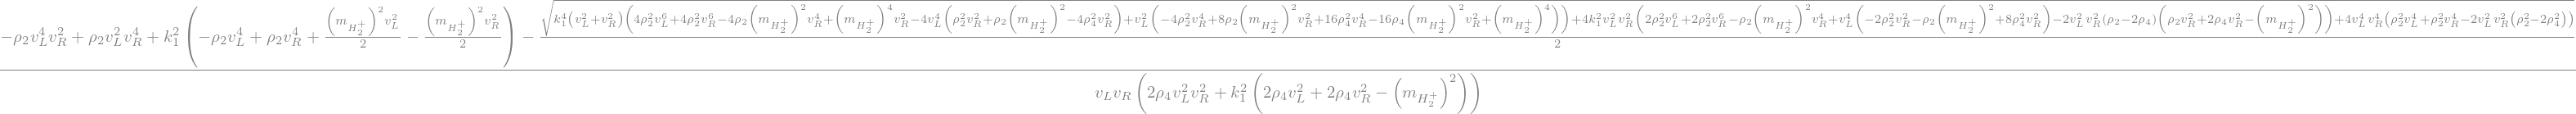

In [953]:
Ppp[0,0]

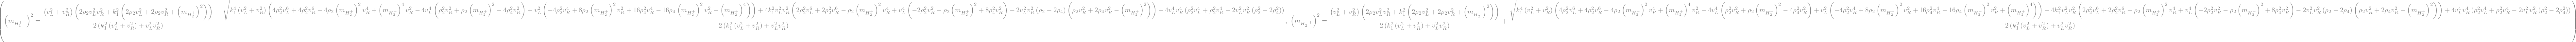

In [949]:
mH1pp = symbols('m_{H_1^{++}}', positive=True)
mH2pp = symbols('m_{H_2^{++}}', positive=True)
eq1 = Eq(mH1pp**2, Dpp[0,0])
eq2 = Eq(mH2pp**2, Dpp[1,1])
eq1, eq2

In [954]:

#rho23_sol = solve([eq1, eq2], [rho2, rho4], dict=True)#[0] # beta1*k1**2 + 2*beta2*k1**2
#rho23_sol

## Mass neutral scalars

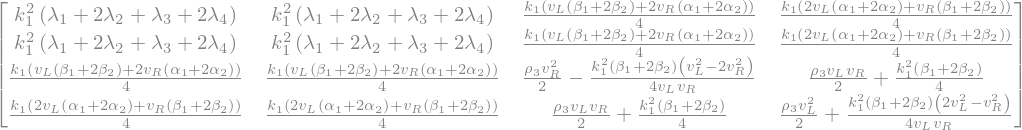

In [955]:
Mrr.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor))

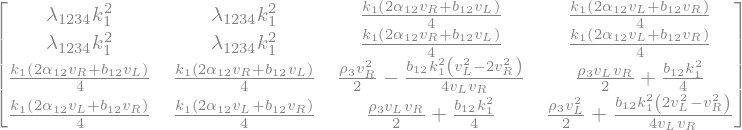

In [958]:
lamb1234 = symbols(r'\lambda_{1234}', real=True)
alpha12 = symbols(r'\alpha_{12}', real=True)
lambda_alpha_changes = {
    lamb1 + 2*lamb2 + lamb3 + 2*lamb4:lamb1234,
    alpha1 + 2*alpha2: alpha12,
    beta1 + 2*beta2:b12
}
Mrr_simplify = Mrr.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor)).subs(lambda_alpha_changes)
Mrr_simplify

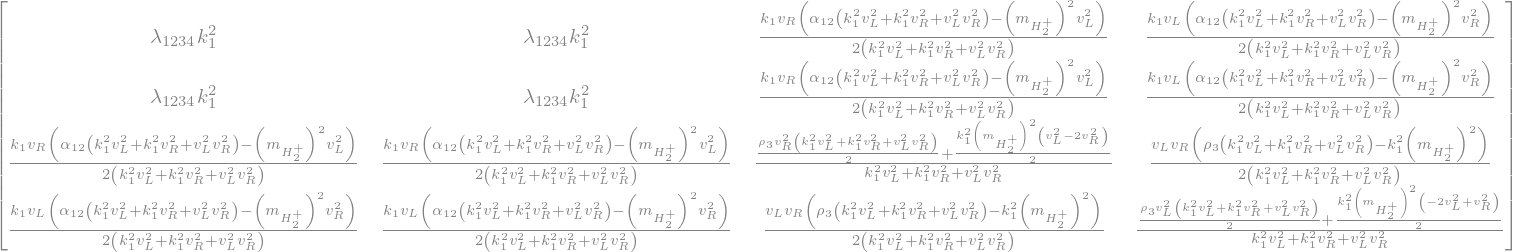

In [963]:
Mrr_simplify2 = Mrr_simplify.tomatrix().subs(b12, (beta1 + 2*beta2).subs(beta12_sol).factor()).applyfunc(simplify)
Mrr_simplify2

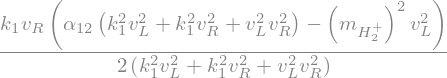

In [964]:
Mrr_simplify2[2, 0]

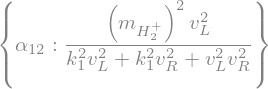

In [966]:
alpha12_sol_caso0 = solve(Mrr_simplify2[2, 0], alpha12, dict=True)[0]
alpha12_sol_caso0

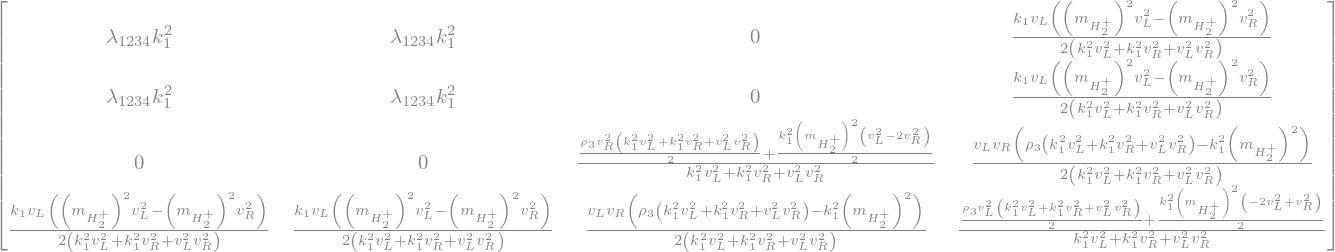

In [ ]:
Mrr_simplify2.subs(alpha12_sol_caso0)

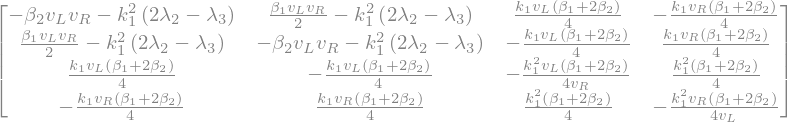

In [969]:
Mii.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor))

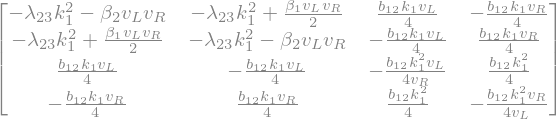

In [970]:
lamb23 = symbols(r'\lambda_{23}', real=True)
lambda_beta_changes = {
    2*lamb2 - lamb3 :lamb23,
    beta1 + 2*beta2:b12
}
Mii_simplify = Mii.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor)).subs(lambda_beta_changes)
Mii_simplify

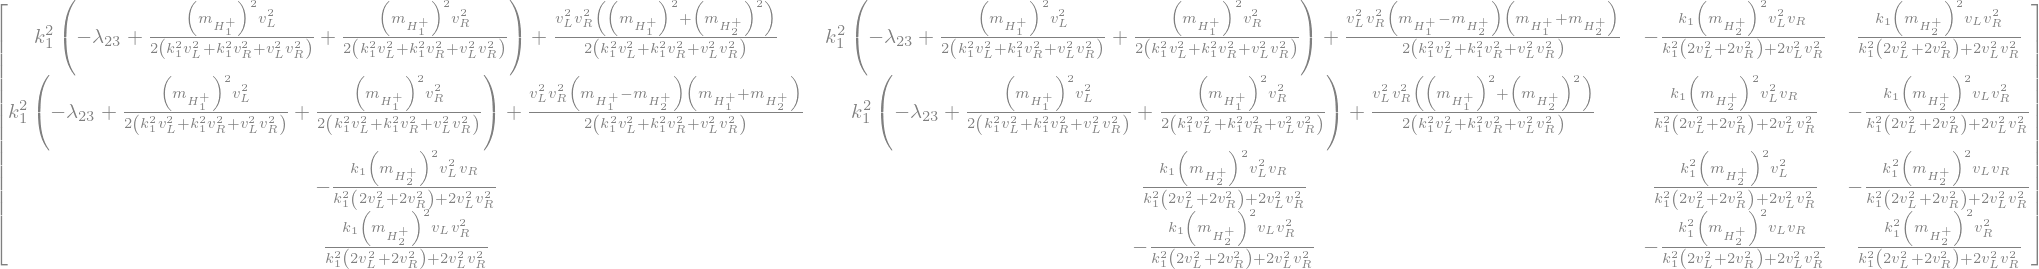

In [975]:
Mii_simplify2 = Mii_simplify.tomatrix().subs(b12, (beta1 + 2*beta2).subs(beta12_sol).factor()).subs(beta12_sol).applyfunc(
    lambda x: x.expand().collect(k1, lambda x:x.collect([vL, vR], factor))
)
Mii_simplify2

In [977]:
Pii, Dii = Mii_simplify2.diagonalize()

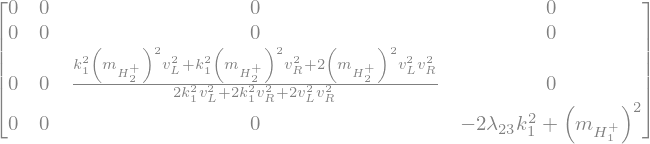

In [978]:
Dii

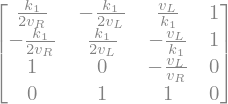

In [979]:
Pii

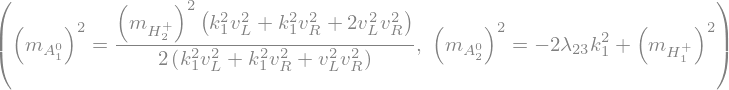

In [987]:
mA1 = symbols('m_{A_1^0}', positive=True)
mA2 = symbols('m_{A_2^0}', positive=True)
eq1ii = Eq(mA1**2, Dii[2,2].factor())
eq2ii = Eq(mA2**2, Dii[3,3])
eq1ii, eq2ii

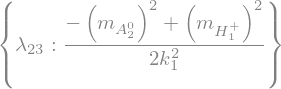

In [988]:
lamb23_sol = solve(eq2ii, lamb23, dict=True)[0]
lamb23_sol

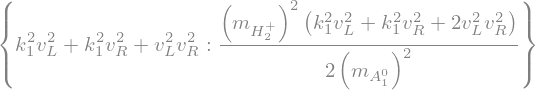

In [989]:
term_vev1LR = solve(eq1ii, k1**2*vL**2 + k1**2*vR**2 + vL**2*vR**2, dict=True)[0]
term_vev1LR 

In [995]:
beta12_sol[beta1] = beta12_sol[beta1].factor().subs(term_vev1LR).factor().collect([k1], factor)

In [997]:
beta12_sol[beta2] = beta12_sol[beta2].factor().subs(term_vev1LR).factor().collect([k1], factor)

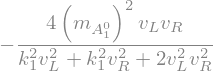

In [999]:
(beta1 + 2*beta2).subs(beta12_sol).factor()

## CP even

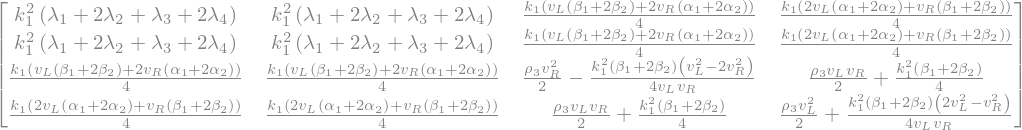

In [1000]:
Mrr.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor))


In [1006]:
lambda_beta_changes

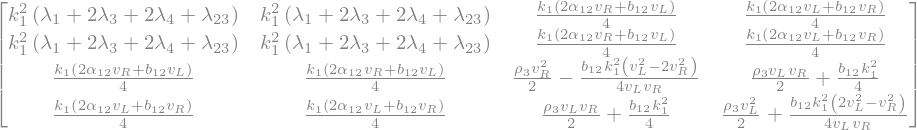

In [1012]:
#lamb1234 = symbols(r'\lambda_{1234}', real=True)
alpha12 = symbols(r'\alpha_{12}', real=True)
lambda_alpha_changes = {
    #lamb1 + 2*lamb2 + lamb3 + 2*lamb4:lamb1234,
    2*lamb2:lamb23 + lamb3,
    alpha1 + 2*alpha2: alpha12,
    beta1 + 2*beta2:b12
}# lambda_alpha_changes
Mrr_simplify = Mrr.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor)).subs(lambda_alpha_changes)
Mrr_simplify


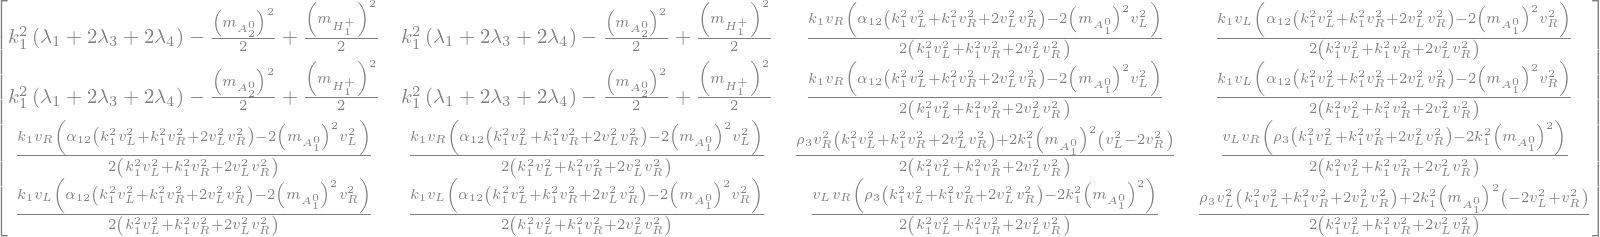

In [1013]:
Mrr_simplify2 = Mrr_simplify.tomatrix().subs(
    b12, (beta1 + 2*beta2).subs(beta12_sol).factor()
).subs(lamb23_sol).applyfunc(simplify)
Mrr_simplify2

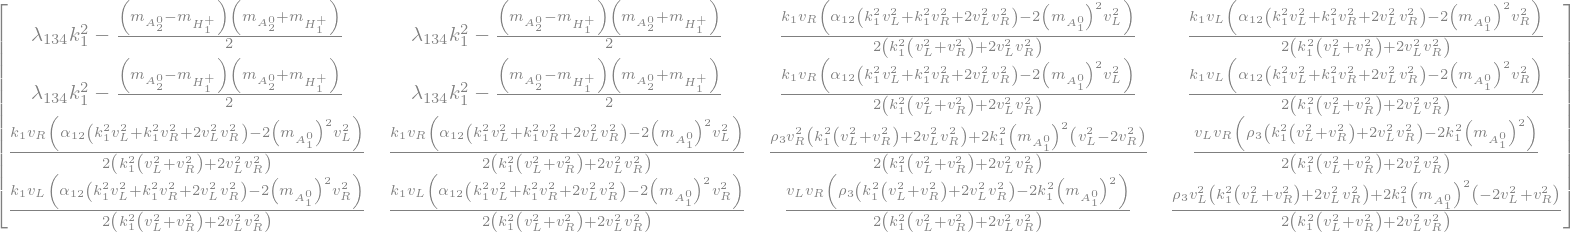

In [1021]:
lamb134 = symbols(r'\lambda_{134}', real=True)
lambda_changes = {lamb1 + 2*lamb3 + 2*lamb4: lamb134}
Mrr_simplify3 = Mrr_simplify2.subs(lambda_changes).applyfunc(lambda x:x.collect(k1, lambda x:x.collect([vL, vR], factor)))
Mrr_simplify3

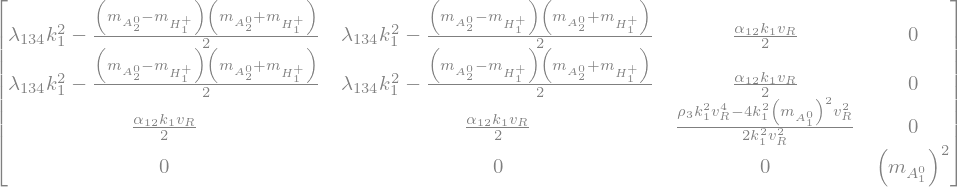

In [1023]:
Mrr_simplify3.subs(vL,0)#.eigenvals()

In [1024]:
Prr, Drr = Mrr_simplify3.subs(vL,0).diagonalize()

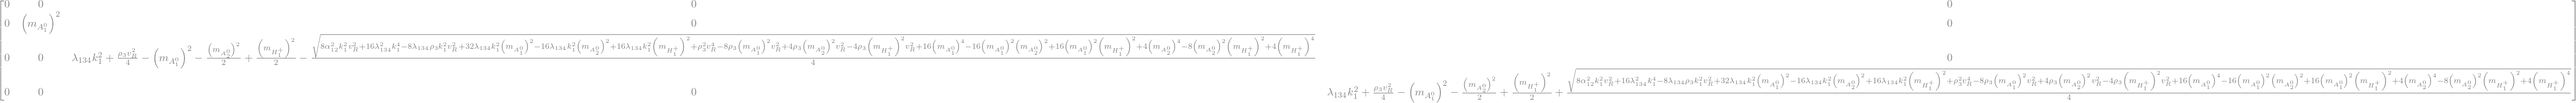

In [1025]:
Drr

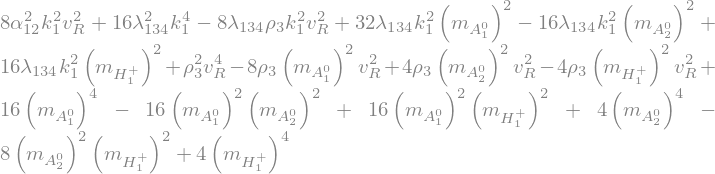

In [1031]:
terminsqrt_rr = (Drr[2,2] - Drr[3,3]).simplify().args[1].args[0]
terminsqrt_rr

In [1034]:
terminsqrt_approx_rr =terminsqrt_rr.collect(k1, lambda x:x.collect(vR, factor))

In [1035]:
Drr[2,2] = Drr[2,2].subs(
        terminsqrt_rr,
        terminsqrt_approx_rr
    ).collect([k1**2])

Drr[3,3] = Drr[3,3].subs(
        terminsqrt_rr,
        terminsqrt_approx_rr
    ).collect([k1**2])

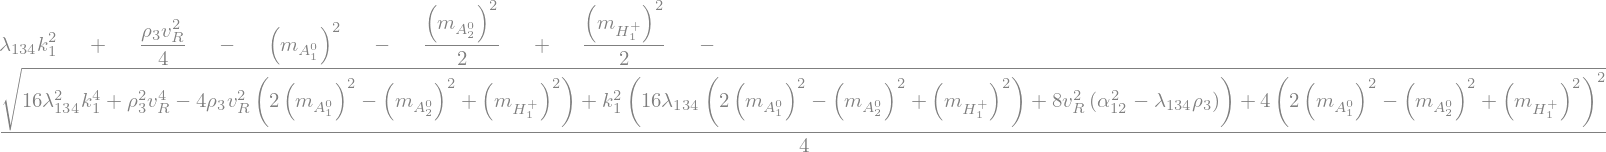

In [1036]:
Drr[2,2]

In [1037]:
mH1, mH2, mH3, mH4 = symbols('m_{H_1}, m_{H_2}, m_{H_3}, m_{H_4}', positive=True)

In [1038]:
eq3rr = Eq(mH3**2, Drr[2,2])
eq4rr = Eq(mH4**2, Drr[3,3])

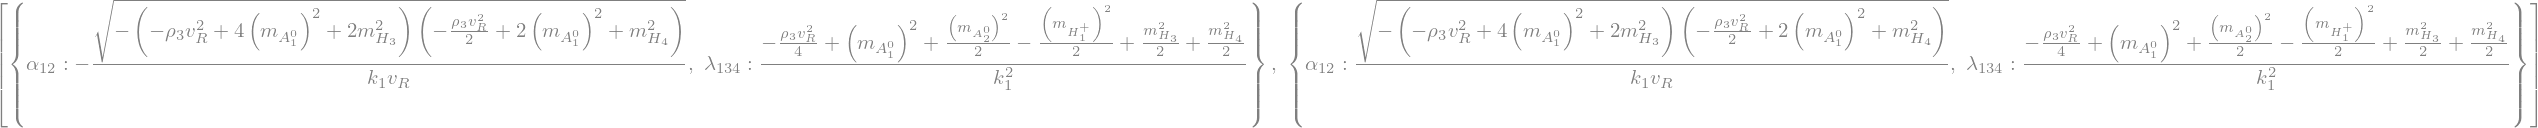

In [1043]:
lamb134_alpha12_sol = solve([eq3rr, eq4rr], [alpha12, lamb134], dict=True)
lamb134_alpha12_sol

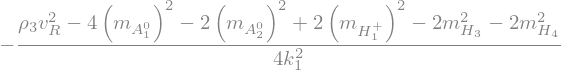

In [1046]:
lamb134_alpha12_sol[0][lamb134].factor()

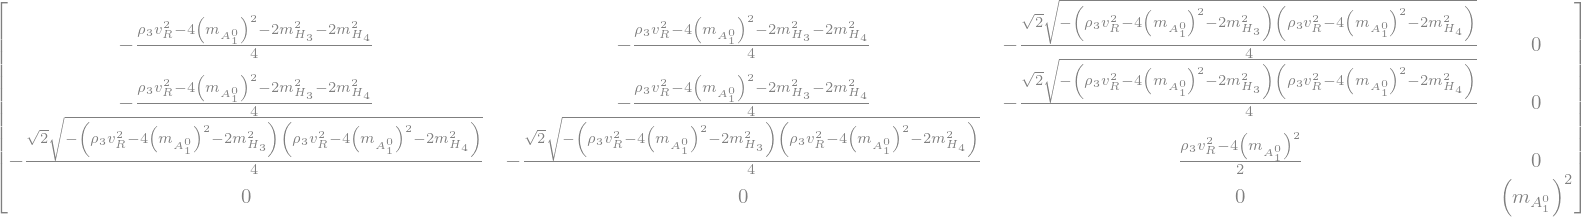

In [1048]:
Mrr_simplify3.subs(vL,0).subs(lamb134_alpha12_sol[0]).applyfunc(factor)


# Yukawa charged lepton sector

In [418]:
from sympy import IndexedBase, Idx

In [419]:
#Indexed?

In [420]:
i,j = symbols('i, j', cls=Idx)
#h = IndexedBase('h')
#ht = IndexedBase(r'\tilde{h}')
hij = symbols('h_{ij}')
htij = symbols(r'\tilde{h}_{ij}')

In [421]:
#ht[i, j]

In [422]:
nueL, numuL, nutauL = symbols(r'{{\nu_{L}}}_e, {{\nu_{L}}}_\mu, {{\nu_{L}}}_\tau')
nueR, numuR, nutauR = symbols(r'{{\nu_{R}}}_e, {{\nu_{R}}}_\mu, {{\nu_{R}}}_\tau')
nuL = IndexedBase(r'{{\nu_{L}}}')
nuR = IndexedBase(r'{{\nu_{R}}}')
eL, muL, tauL = symbols(r'e_L, \mu_L, \tau_L')
eR, muR, tauR = symbols(r'e_R, \mu_R, \tau_R')
lL = IndexedBase('{{l_L}}')
lR = IndexedBase('{{l_R}}')

In [ ]:
nueL, nuL[i]

In [ ]:
LLi = Matrix(
    [
        [nuL[i]],
        [lL[i]]
    ]
)
LRj = Matrix(
    [
        [nuR[j]],
        [lR[j]]
    ]
)
Dagger(LLi), LRj

⎛⎡______________  __________⎤  ⎡{{\nu_{R}}}[j]⎤⎞
⎜⎣{{\nu_{L}}}[i]  {{l_L}}[i]⎦, ⎢              ⎥⎟
⎝                              ⎣  {{l_R}}[j]  ⎦⎠

In [ ]:
Phitilde

⎡\phi⁰₂   -\phi⁻₂⎤
⎢                ⎥
⎣-\phi⁺₁  \phi⁰₁ ⎦

In [ ]:
LY = (Dagger(LLi)*(hij*Phi + htij*Phitilde)*LRj)[0].subs(vevPhi)

In [ ]:
LY

Charged lepton mass

In [ ]:
Ml = LY.args[0].args[0]
Ml

Dirac neutrino mass

In [ ]:
MnuD = LY.args[1].args[0]
MnuD

As we know, the scale of mass of charged leptons is greater than neutrino mass scale. Thus, we assume $k >> k_1$ and $h_{ij} >> \tilde{h}_{ij}$. In this aproximation

In [ ]:
Ml = k*hij
Ml